<a href="https://colab.research.google.com/github/Jiablero/notebooks/blob/master/stepik_pandas_tricks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
%matplotlib inline

Датасет здесь: https://www.kaggle.com/carolzhangdc/imdb-5000-movie-dataset/

In [5]:
# для загрузки файла на Google Colab
from google.colab import files
uploaded = files.upload()

**Step 3** 

In [0]:
movie = pd.read_csv('imdb-5000-movie-dataset.zip')

In [4]:
movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [0]:
genres = movie[['movie_title', 'genres']]


In [8]:
genres

,movie_title,genres
0,Avatar,Action|Adventure|Fantasy|Sci-Fi
1,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy
2,Spectre,Action|Adventure|Thriller
3,The Dark Knight Rises,Action|Thriller
4,Star Wars: Episode VII - The Force Awakens ...,Documentary
...,...,...
5038,Signed Sealed Delivered,Comedy|Drama
5039,The Following,Crime|Drama|Mystery|Thriller
5040,A Plague So Pleasant,Drama|Horror|Thriller
5041,Shanghai Calling,Comedy|Drama|Romance


In [9]:
for i in genres:
    print(i)

movie_title
genres


In [0]:
for i in genres.values:
    print(i) 

In [0]:
for row in genres.values:
    for value in row:
        print(value)

In [0]:
def reversator(value):
    return value[::-1]

In [0]:
for row in genres.values:
    for value in row:
        print(reversator(value))


In [0]:
for row in genres.iterrows():
    print(row)

In [0]:
for i, row in genres.iterrows():
    print(row.map(reversator))

In [0]:
for i, col in genres.iteritems():
    print(col)

In [0]:
for i, col in genres.iteritems():
    print(col.map(reversator))

**Step 4**

In [0]:
budget=movie[['budget', 'duration']]

In [19]:
budget.head()

,budget,duration
0,237000000.0,178.0
1,300000000.0,169.0
2,245000000.0,148.0
3,250000000.0,164.0
4,NaN,NaN


In [21]:
budget.applymap(lambda x: x + 1) # применяет ф-цию к каждому значению датасета

,budget,duration
0,237000001.0,179.0
1,300000001.0,170.0
2,245000001.0,149.0
3,250000001.0,165.0
4,NaN,NaN
...,...,...
5038,NaN,88.0
5039,NaN,44.0
5040,1401.0,77.0
5041,NaN,101.0


In [24]:
budget.apply(np.mean, axis=0) # применяет функцию к колонке, или к строке

budget      3.975262e+07
duration    1.072011e+02
dtype: float64

In [25]:
budget.transform(lambda x: x + 1) 

,budget,duration
0,237000001.0,179.0
1,300000001.0,170.0
2,245000001.0,149.0
3,250000001.0,165.0
4,NaN,NaN
...,...,...
5038,NaN,88.0
5039,NaN,44.0
5040,1401.0,77.0
5041,NaN,101.0


In [0]:
def mm(col):
    return np.mean(col) + 1

In [27]:
budget.apply(mm)

budget      3.975262e+07
duration    1.082011e+02
dtype: float64

In [28]:
budget.mean() + 1

budget      3.975262e+07
duration    1.082011e+02
dtype: float64

**Step 5** 

In [30]:
# np array выигрывает в скорости по сравнению с pd.DataFrame
np.mean(budget['budget'].values)

nan

In [31]:
# но и имеет свои неудобства: применяем dropna() чтобы посчитать mean()
np.mean(budget['budget'].dropna().values)

39752620.436387606

**Step 7**
Time Series

In [0]:
stock=pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/amzn_stock.csv')

In [41]:
stock.head()

,Date,Open,High,Low,Close,Volume
0,2010-01-04,136.25,136.61,133.14,133.90,7600543
1,2010-01-05,133.43,135.48,131.81,134.69,8856456
2,2010-01-06,134.60,134.73,131.65,132.25,7180977
3,2010-01-07,132.01,132.32,128.80,130.00,11030124
4,2010-01-08,130.56,133.68,129.03,133.52,9833829


In [37]:
stock.index

RangeIndex(start=0, stop=1896, step=1)

In [0]:
# делаем дату индексом
stock=pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/amzn_stock.csv',
                  index_col='Date', parse_dates=True)

In [43]:
stock.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2017-07-03', '2017-07-05', '2017-07-06', '2017-07-07',
               '2017-07-10', '2017-07-11', '2017-07-12', '2017-07-13',
               '2017-07-14', '2017-07-17'],
              dtype='datetime64[ns]', name='Date', length=1896, freq=None)

In [0]:
stock['2010']

In [0]:
stock['2010-02':'2011-03']

In [0]:
stock.resample('2h').asfreq()

In [0]:
stock.resample('1w').mean()

In [48]:
stock.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.25,136.61,133.14,133.90,7600543
2010-01-05,133.43,135.48,131.81,134.69,8856456
2010-01-06,134.60,134.73,131.65,132.25,7180977
2010-01-07,132.01,132.32,128.80,130.00,11030124
2010-01-08,130.56,133.68,129.03,133.52,9833829
2010-01-11,132.62,132.80,129.21,130.31,8786668
2010-01-12,128.99,129.82,126.55,127.35,9098190
2010-01-13,127.90,129.71,125.75,129.11,10727856
2010-01-14,129.14,130.38,126.40,127.35,9788435


In [50]:
stock.rolling(3)

Rolling [window=3,center=False,axis=0]

In [0]:
stock.rolling(3).mean()

In [54]:
stock.rolling(3, min_periods=1).mean()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.250000,136.610000,133.140000,133.900000,7.600543e+06
2010-01-05,134.840000,136.045000,132.475000,134.295000,8.228500e+06
2010-01-06,134.760000,135.606667,132.200000,133.613333,7.879325e+06
2010-01-07,133.346667,134.176667,130.753333,132.313333,9.022519e+06
2010-01-08,132.390000,133.576667,129.826667,131.923333,9.348310e+06
...,...,...,...,...,...
2017-07-11,982.516667,991.846667,978.786667,989.786667,3.057460e+06
2017-07-12,992.883333,1001.326667,988.440000,999.036667,3.379189e+06
2017-07-13,999.423333,1003.806667,992.573333,1000.423333,3.157356e+06


In [55]:
stock.expanding(3).mean()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.250000,136.610000,133.140000,133.900000,7.600543e+06
2010-01-05,134.840000,136.045000,132.475000,134.295000,8.228500e+06
2010-01-06,134.760000,135.606667,132.200000,133.613333,7.879325e+06
2010-01-07,134.072500,134.785000,131.350000,132.710000,8.667025e+06
2010-01-08,133.370000,134.564000,130.886000,132.872000,8.900386e+06
...,...,...,...,...,...
2017-07-11,376.749450,380.480122,372.654524,376.793171,4.534246e+06
2017-07-12,377.079033,380.811907,372.984923,377.125827,4.533757e+06
2017-07-13,377.410364,381.142460,373.313812,377.455026,4.532884e+06


In [56]:
stock.ewm(alpha=0.7).mean()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.250000,136.610000,133.140000,133.900000,7.600543e+06
2010-01-05,134.080769,135.740769,132.116923,134.507692,8.566630e+06
2010-01-06,134.454317,135.013597,131.781007,132.883453,7.569757e+06
2010-01-07,132.729323,133.112682,129.677262,130.848553,1.001179e+07
2010-01-08,131.207098,133.510772,129.223075,132.723121,9.886915e+06
...,...,...,...,...,...
2017-07-11,989.084881,995.142613,982.059585,992.890941,3.089057e+06
2017-07-12,997.180464,1004.527784,993.287876,1002.424282,3.452719e+06
2017-07-13,1002.388139,1006.174335,995.116363,1001.168285,3.052354e+06


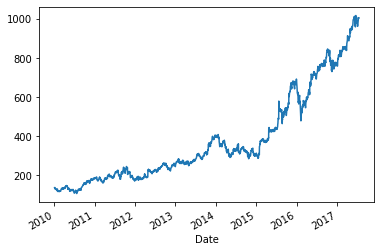

In [57]:
stock['Open'].plot()

In [0]:
ns=stock['Open'].rolling(10, min_periods=1).mean()

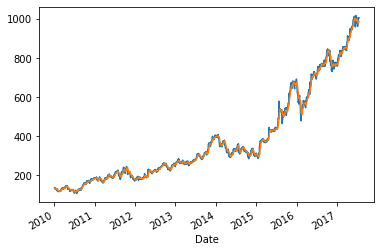

In [63]:
stock['Open'].plot()
ns.plot()

**Step 9**

In [64]:
stock.index.weekday

Int64Index([0, 1, 2, 3, 4, 0, 1, 2, 3, 4,
            ...
            0, 2, 3, 4, 0, 1, 2, 3, 4, 0],
           dtype='int64', name='Date', length=1896)

In [0]:
stock.index.weekday_name.value_counts() # у меня не работает

In [69]:
stock.index.day_name().value_counts()

Wednesday    390
Tuesday      389
Thursday     382
Friday       380
Monday       355
Name: Date, dtype: int64